In [101]:
import jieba
import jieba.analyse
import pandas as pd
import numpy
from collections import Counter

In [102]:
orgdata = pd.read_csv('abc.csv')

In [103]:
orgdata.head()

,編號,案類,發生日期,發生時段,發生地點,備註
0,1,強盜,1070130,16~18,台北市中山區中山北路2段31~60號,NaN
1,2,強盜,1070301,04~06,台北市北投區福興里致遠一路2段1~30號,NaN
2,3,強盜,1071115,16~18,台北市士林區舊佳里中正路211~240號,NaN
3,4,強盜,1071125,08~10,台北市大安區永康里永康街1~30號,NaN
4,5,強盜,1071211,12~14,台北市文山區博嘉里020鄰木柵路4段1~30號,NaN


In [104]:
documents = ['我是臺師大科技系學生邱致瑋']
for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

我/是/臺師大/科技系/學生/邱致瑋


In [105]:
jieba.load_userdict('./userdict.txt')

for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

我/是/臺師大/科技系/學生/邱致瑋


In [106]:
orgdata['seg'] = ""
orgdata.head()

,編號,案類,發生日期,發生時段,發生地點,備註,seg
0,1,強盜,1070130,16~18,台北市中山區中山北路2段31~60號,NaN,
1,2,強盜,1070301,04~06,台北市北投區福興里致遠一路2段1~30號,NaN,
2,3,強盜,1071115,16~18,台北市士林區舊佳里中正路211~240號,NaN,
3,4,強盜,1071125,08~10,台北市大安區永康里永康街1~30號,NaN,
4,5,強盜,1071211,12~14,台北市文山區博嘉里020鄰木柵路4段1~30號,NaN,


In [107]:
jieba.analyse.set_stop_words('stopwords.txt')
index = 0
for documents in orgdata['發生地點']:
    seg_list = jieba.analyse.extract_tags(documents, 150)
    #seg_list = jieba.lcut(documents)
    orgdata['seg'].iloc[index] = seg_list
    index += 1

C:\Users\will_\AppData\Local\Temp\ipykernel_19416\1761007963.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [108]:
orgdata['seg']

0                   [中山北路, 60, 台北市, 中山]
1           [區福興里, 致遠, 30, 北投, 台北市, 一路]
2      [佳里, 區舊, 中正路, 211, 240, 台北市, 士林]
3                     [永康, 30, 大安, 台北市]
4      [區博, 020, 鄰木柵路, 30, 嘉里, 文山, 台北市]
5                 [景行, 里車, 前路, 文山, 台北市]
6       [信義區, 三犁里, 煙火, 觀景, 象山, 台北市, 登山]
7     [區湖, 陽金, 槽橋, 北投, 台北市, 田里, 下方, 公路]
8              [信義區, 181, 210, 虎林, 台北市]
9               [信義區, 225, 30, 永吉, 台北市]
10                [20, 30, 台北市, 哈密, 大同]
11       [區立賢里, 承德路, 211, 240, 北投, 台北市]
12                    [三重, 30, 南港, 台北市]
13            [大安, 區光, 武里, 東路, 忠孝, 台北市]
14              [萬華區, 西園, 212, 16, 台北市]
15               [信義區, 中坡, 30, 台北市, 北路]
16                [區長, 60, 台北市, 安西, 大同]
17                  [萬華區華, 30, 台北市, 西街]
18                    [區歸, 綏街, 台北市, 大同]
19          [區長, 181, 210, 台北市, 安西, 大同]
20         [石牌路, 181, 210, 北投, 永明, 台北市]
21      [東路, 181, 210, 四段, 大安, 忠孝, 台北市]
Name: seg, dtype: object

In [109]:
words = list(orgdata['發生時段'])
show_key = pd.DataFrame(Counter(words).keys())
show_values = pd.DataFrame(Counter(words).values())

In [110]:
df = [show_key, show_values]

In [111]:
result = pd.concat(df, axis=1)
result.columns = ['time', 'freguency']
result

,time,freguency
0,16~18,2
1,04~06,4
2,08~10,1
3,12~14,1
4,02~04,3
5,20~22,1
6,10~12,1
7,00~02,3
8,22~24,2
9,14~16,1


In [112]:
import plotly.express as px
import pandas as pd

px.bar(result, x='time', y='freguency', title='Question')

In [113]:
show_sub = orgdata['發生時段']=='02~04'
subdata = orgdata[show_sub]
subdata

,編號,案類,發生日期,發生時段,發生地點,備註,seg
5,6,強盜,1080124,02~04,台北市文山區景行里車前路29巷,NaN,"[景行, 里車, 前路, 文山, 台北市]"
13,14,強盜,1090404,02~04,台北市大安區光武里忠孝東路4段101巷(大安路1段31巷),NaN,"[大安, 區光, 武里, 東路, 忠孝, 台北市]"
18,19,強盜,1100205,02~04,台北市大同區歸綏街151~180號,NaN,"[區歸, 綏街, 台北市, 大同]"


In [114]:
type(subdata['seg'])

pandas.core.series.Series

In [115]:
subdata_seg_list = subdata['seg'].tolist()
type(subdata_seg_list)

list

In [116]:
subdata_seg_list

[['景行', '里車', '前路', '文山', '台北市'],
 ['大安', '區光', '武里', '東路', '忠孝', '台北市'],
 ['區歸', '綏街', '台北市', '大同']]

In [117]:
flat = [x for sublist in subdata_seg_list for x in sublist]
diction = Counter(flat)

In [118]:
diction.keys()

dict_keys(['景行', '里車', '前路', '文山', '台北市', '大安', '區光', '武里', '東路', '忠孝', '區歸', '綏街', '大同'])

In [119]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [120]:
import numpy as np

In [121]:
mask = np.array(Image.open("test.jpg"))
font = "C:\Windows\Fonts\MSJH.TTC"

In [122]:
wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)

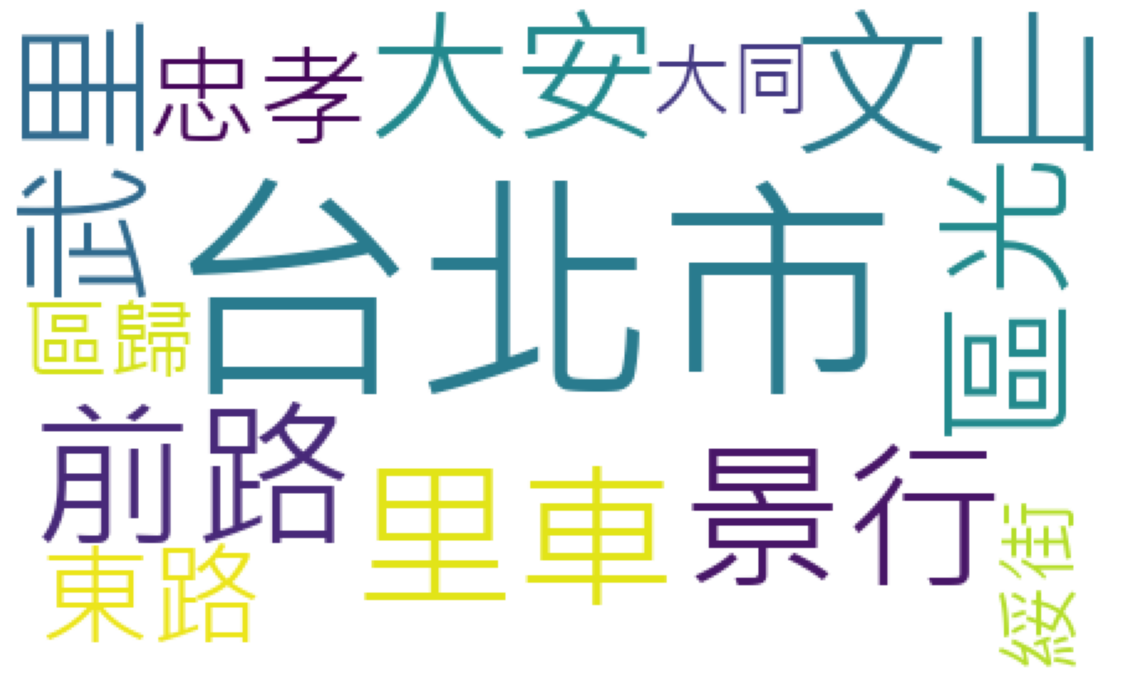

In [123]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [83]:
show_sub = orgdata['發生時段']=='02~04'
subdata = orgdata[show_sub]
subdata

KeyError: '特約服務項目'

In [57]:
subdata.to_csv("test.csv", index=False)